<a href="https://colab.research.google.com/github/endangrusiana123/SistemCerdas/blob/main/TugasKelompokKe1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Wine Quality Classification Using Random Forest Algorithm

# Import Library

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

In [ ]:
# downloaded from https://www.kaggle.com/datasets/yasserh/wine-quality-dataset
path = 'WineQT.csv'
data = pd.read_csv(path)
data.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


# Modify Dataset

In [ ]:
# Drop columns ID , not adding any value to the data
data.drop(columns="Id",inplace=True)

# Create a new target variable for classification (binary classification example: quality >= 7 is good)
data['quality_class'] = np.where(data['quality'] >= 7, 1, 0)

# Dataset Preview

**Dataset Head**

In [ ]:
data.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_class
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,0


**Data Composition of Quality Class**

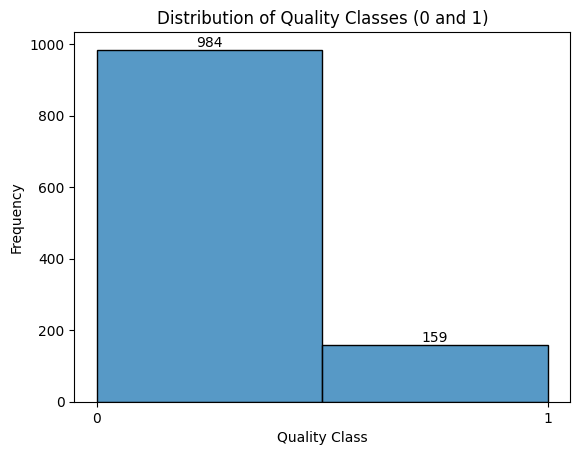

In [ ]:
# Create the histogram
ax = sns.histplot(data['quality_class'], bins=[0, 0.25, 0.75, 1], binwidth=0.5)

# Add labels and title
plt.xlabel('Quality Class')
plt.ylabel('Frequency')
plt.title('Distribution of Quality Classes (0 and 1)')
plt.xticks([0, 1])
# Add count on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()

# Split data for Validation and Test

**50% training, 25% Validation, and 25% Testing**

In [ ]:
# Define feature variables and target variable
X = data.drop(['quality', 'quality_class'], axis=1)
y = data['quality_class']

# Split the dataset
# Data for training and validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
# Data for testing
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Training and Validation Random Forest

**Scaler**

Standardizing the feature variables is a common preprocessing step in machine learning pipelines, especially for algorithms that are sensitive to the scale of input features, such as Support Vector Machines (SVM), k-Nearest Neighbors (k-NN), and neural networks.

However, after applying the StandardScaler, the data is transformed such that each feature has a mean of 0 and a standard deviation of 1, which helps in better training of machine learning models, especially those that are sensitive to the scale of input features.

In [ ]:
# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

**Training and Validation**

Accuracy: 0.8811188811188811
Precision: 0.6111111111111112
Recall: 0.2894736842105263
F1 Score: 0.3928571428571429
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       248
           1       0.61      0.29      0.39        38

    accuracy                           0.88       286
   macro avg       0.76      0.63      0.66       286
weighted avg       0.86      0.88      0.86       286



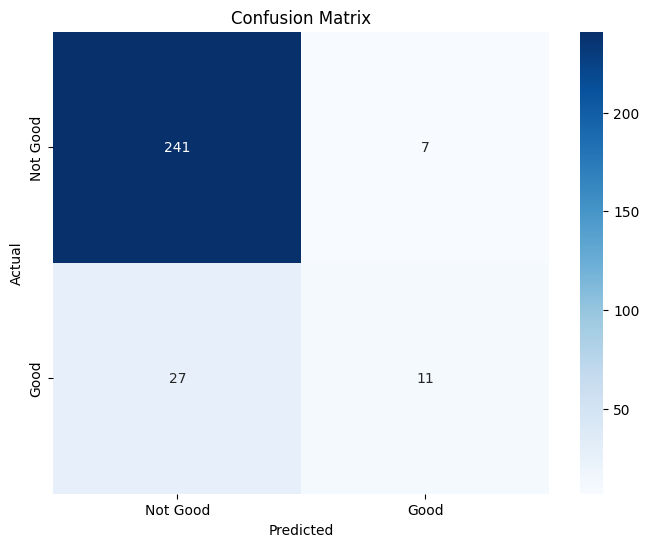

Feature Importances:
alcohol                 0.184834
sulphates               0.126539
volatile acidity        0.095653
density                 0.092158
citric acid             0.089155
fixed acidity           0.082371
chlorides               0.079423
total sulfur dioxide    0.075488
residual sugar          0.063692
free sulfur dioxide     0.056817
pH                      0.053870
dtype: float64


In [ ]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_val)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:")
print(classification_report(y_val, y_pred))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Good", "Good"], yticklabels=["Not Good", "Good"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature importance
feature_importance = rf_classifier.feature_importances_
feature_names = X.columns
important_features = pd.Series(feature_importance, index=feature_names).sort_values(ascending=False)

print("Feature Importances:")
print(important_features)


# Random Forest Architecture

**Install required library**

In [ ]:
!pip install graphviz
!apt-get install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


**Number of trees**

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Get the number of trees in the Random Forest
num_trees = len(rf_classifier.estimators_)
print(f"The Random Forest model has {num_trees} trees.")


The Random Forest model has 100 trees.


**Draw Single Tree From Random Forest**: 1st tree from 100 trees

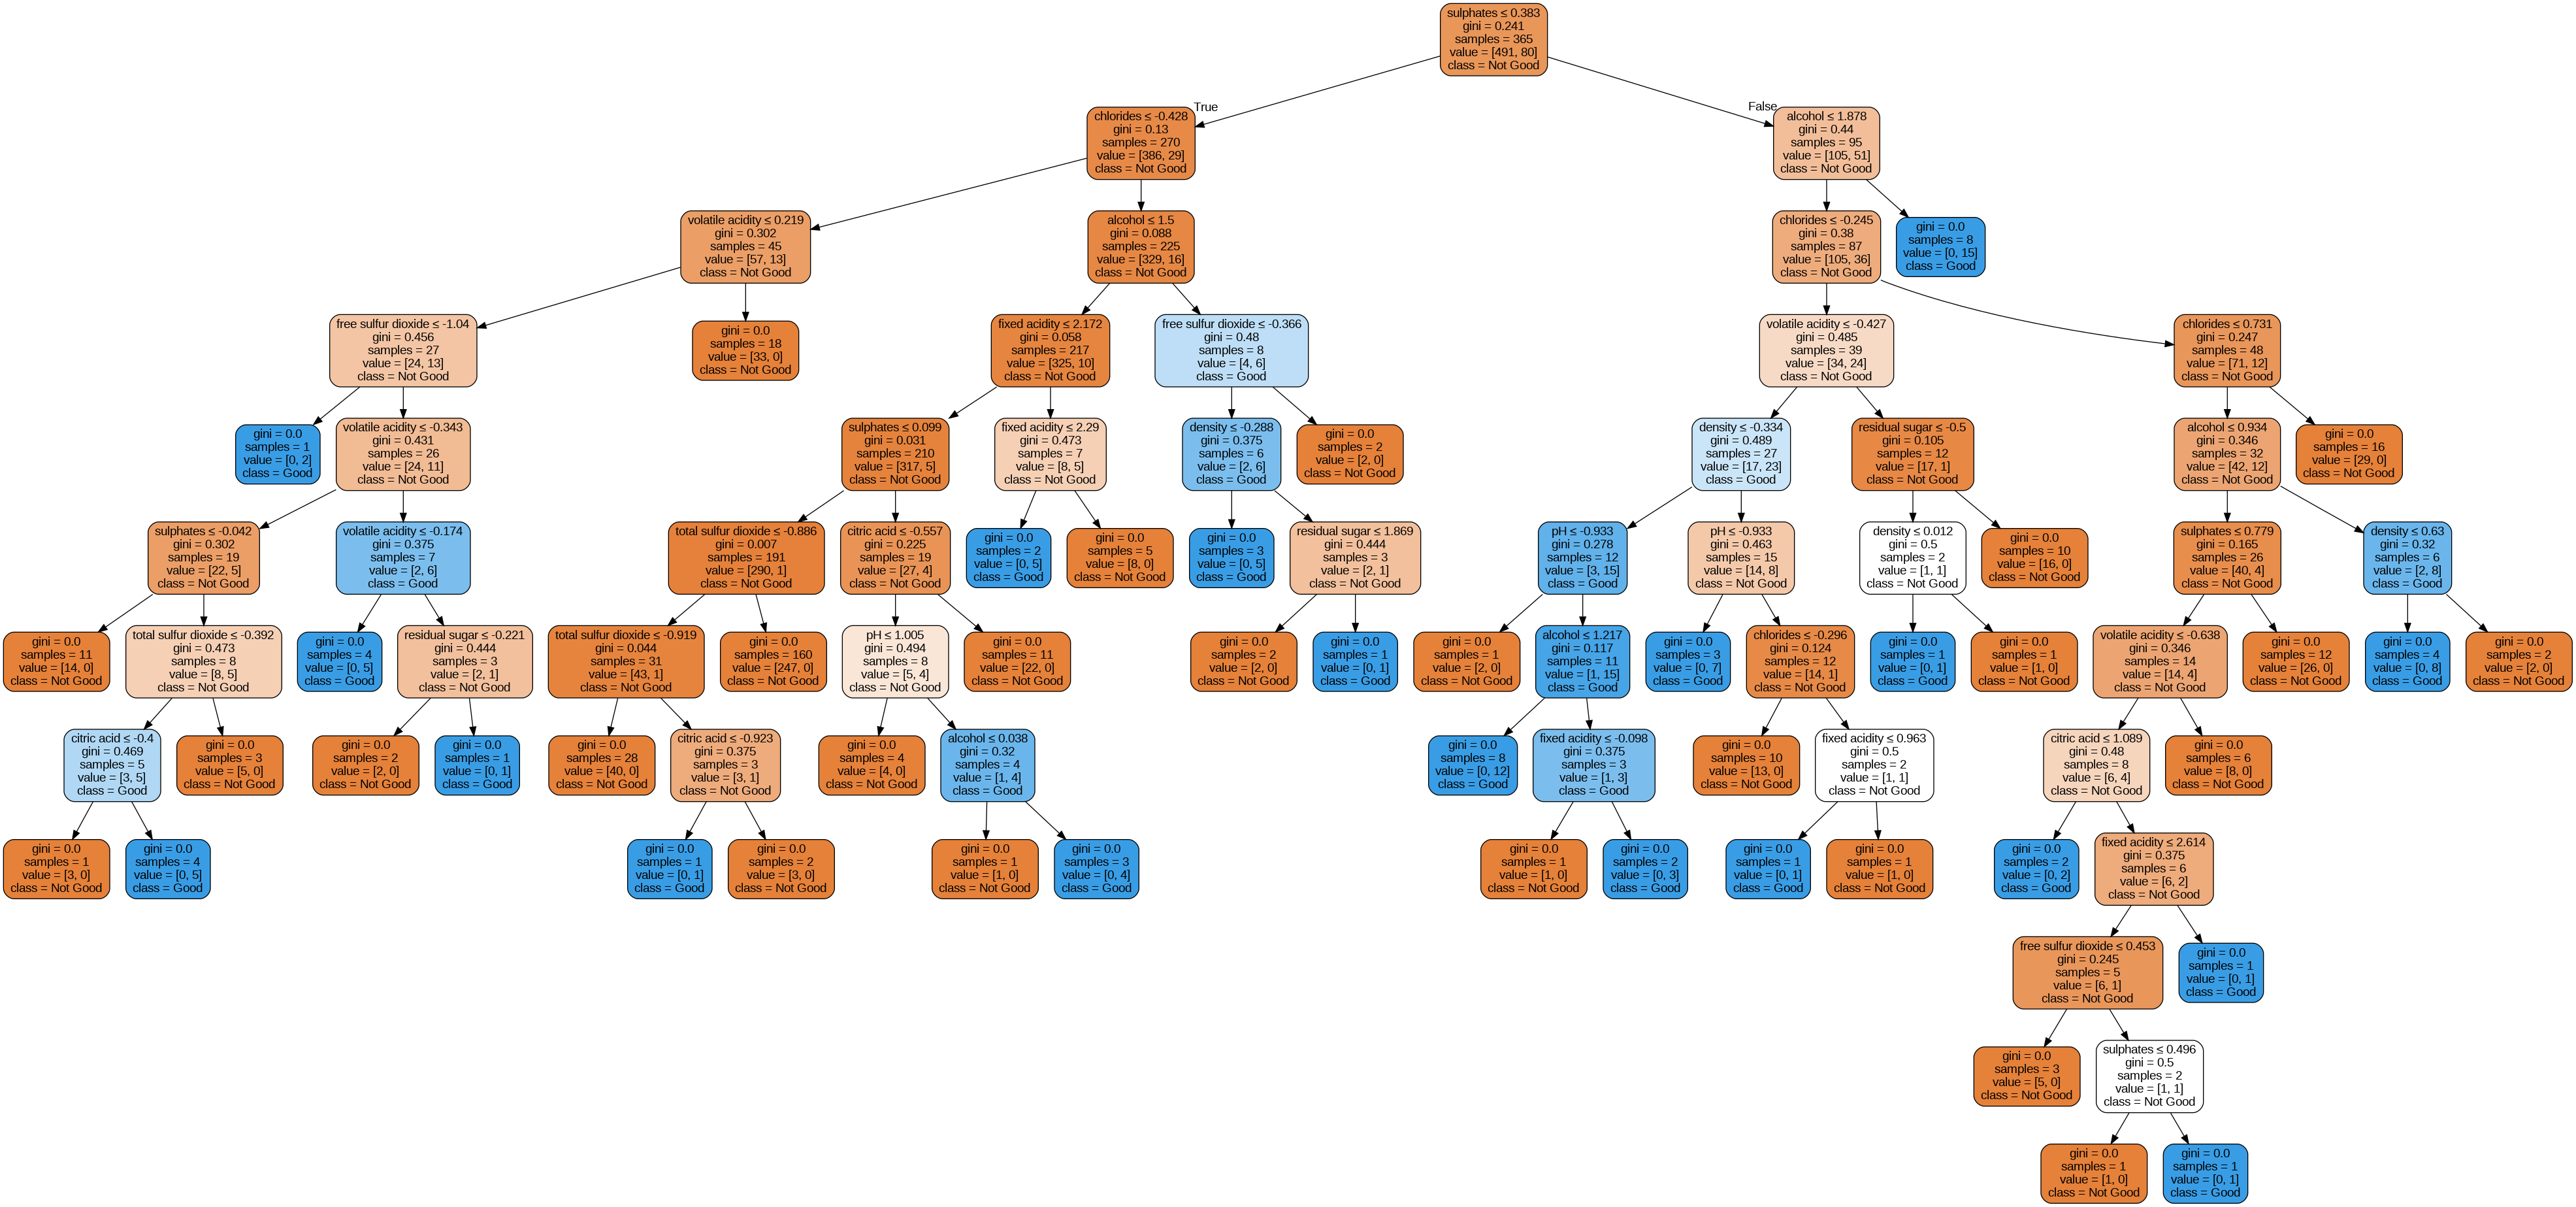

In [ ]:
# Extract a single tree from the Random Forest
estimator = rf_classifier.estimators_[0] # 0:first tree model

# Export the tree to a dot file
dot_data = export_graphviz(estimator, out_file=None,
                           feature_names=data.drop(['quality', 'quality_class'], axis=1).columns,
                           class_names=['Not Good', 'Good'],
                           filled=True, rounded=True,
                           special_characters=True)

# Convert the dot file to a graph
graph = graphviz.Source(dot_data)

# Render the graph to a PNG file
graph.render("random_forest_tree_1st", format='png')

# Display the PNG image in Colab
from IPython.display import Image
Image(filename='random_forest_tree_1st.png')

**Draw Single Tree From Random Forest**: 50th tree from 100 trees

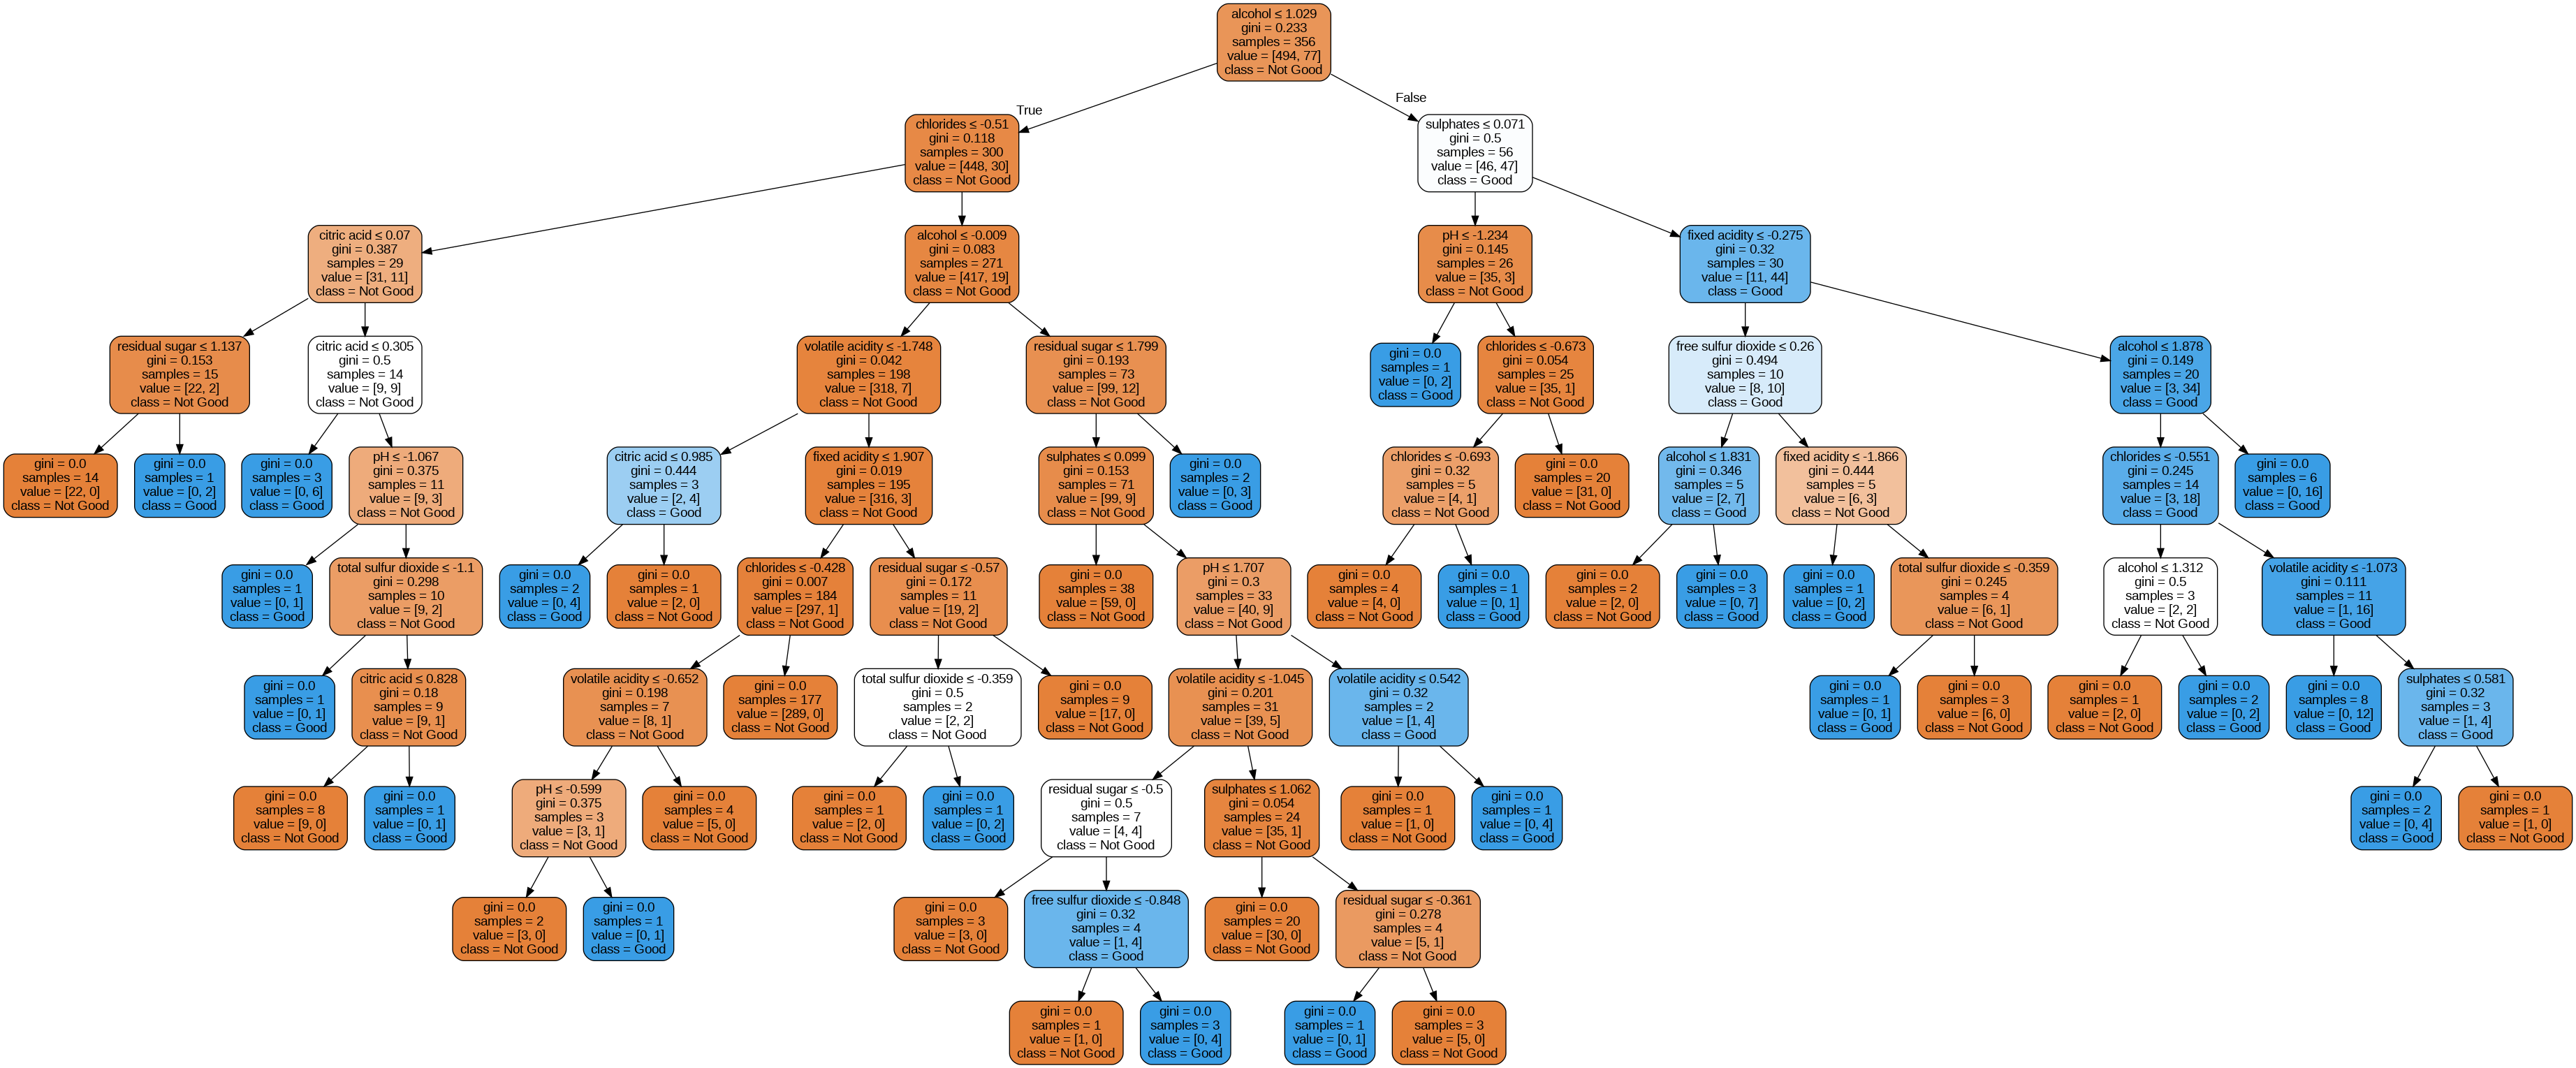

In [ ]:
# Extract a single tree from the Random Forest
estimator = rf_classifier.estimators_[49]

# Export the tree to a dot file
dot_data = export_graphviz(estimator, out_file=None,
                           feature_names=data.drop(['quality', 'quality_class'], axis=1).columns,
                           class_names=['Not Good', 'Good'],
                           filled=True, rounded=True,
                           special_characters=True)

# Convert the dot file to a graph
graph = graphviz.Source(dot_data)

# Render the graph to a PNG file
graph.render("random_forest_tree_50th", format='png')

# Display the PNG image in Colab
from IPython.display import Image
Image(filename='random_forest_tree_50th.png')

# Testing Random Forest

**Scaler**

In [ ]:
# Standardize the feature variables
X_test = scaler.transform(X_test)

**Testing**

Accuracy Test: 0.9090909090909091
Precision Test: 0.7727272727272727
Recall Test: 0.4473684210526316
F1 Score Test: 0.5666666666666667
Classification Report Test:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       248
           1       0.77      0.45      0.57        38

    accuracy                           0.91       286
   macro avg       0.85      0.71      0.76       286
weighted avg       0.90      0.91      0.90       286



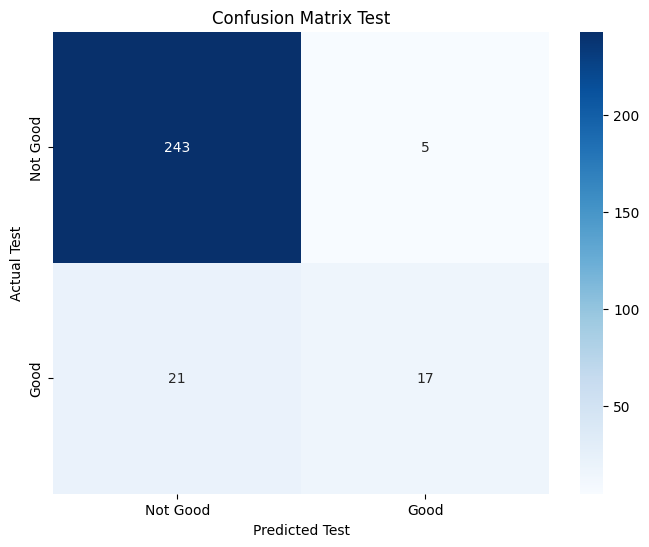

Feature Importances:
alcohol                 0.184834
sulphates               0.126539
volatile acidity        0.095653
density                 0.092158
citric acid             0.089155
fixed acidity           0.082371
chlorides               0.079423
total sulfur dioxide    0.075488
residual sugar          0.063692
free sulfur dioxide     0.056817
pH                      0.053870
dtype: float64


In [ ]:
# Make predictions
y_pred_test = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

# Print the evaluation metrics
print("Accuracy Test:", accuracy_test)
print("Precision Test:", precision_test)
print("Recall Test:", recall_test)
print("F1 Score Test:", f1_test)

# Print the classification report
print("Classification Report Test:")
print(classification_report(y_test, y_pred_test))

# Compute the confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Good", "Good"], yticklabels=["Not Good", "Good"])
plt.xlabel('Predicted Test')
plt.ylabel('Actual Test')
plt.title('Confusion Matrix Test')
plt.show()

# Feature importance
feature_importance = rf_classifier.feature_importances_
feature_names = X.columns
important_features = pd.Series(feature_importance, index=feature_names).sort_values(ascending=False)

print("Feature Importances:")
print(important_features)
